### **Project Objective : Building an Regression model to predict the Homestay Prices of Residential Properties**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Importing the data

In [2]:
df = pd.read_excel("Air_BNB.xlsx")

In [3]:
df.drop('id' , axis = 1 , inplace = True)

In [4]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [5]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [6]:
df.shape

(74111, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [8]:
round(df.describe() , 2).T

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0
cleaning_fee,74107.0,0.73,0.44,0.0,0.00,1.00,1.00,1.0
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper() ,' : ' , df['room_type'].nunique())
        print()
        print(df[column].value_counts())
        print()

ROOM_TYPE  :  3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

CANCELLATION_POLICY  :  3

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

INSTANT_BOOKABLE  :  3

instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [10]:
df_1 = df.copy()

In [11]:
df_1.drop_duplicates(inplace = True)

In [12]:
df_1 = pd.get_dummies(df_1,columns = ['room_type','cancellation_policy','instant_bookable'],drop_first = True,dtype = float)

In [13]:
df_1

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,NaN,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [14]:
df_1.isna().sum()

accommodates                        3
bathrooms                         195
cleaning_fee                        4
review_scores_rating            10215
bedrooms                           92
beds                              125
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
instant_bookable_t                  0
dtype: int64

## Null Value Treatment

In [15]:
df_mean = df_1

In [16]:
for column in df_mean.columns:
    if df_mean[column].dtype != 'object' :
         mean = df_mean[column].mean()
         df_mean[column] = df_mean[column].fillna(mean)

In [17]:
for column in df_mean.columns:
    
    
    if df_mean[column].dtype != 'object':
    
    
        mean = df_mean[column].mean()
    
    
        df_mean[column] = df_mean[column].fillna(mean)

In [18]:
df_mean

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [19]:
df_mean.isna().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [20]:
df_med = df_1.copy()

In [21]:
for column in df_med.columns:
    if df_med[column].dtype != 'object' :
        median = df_med[column].median()
        df_med[column] = df_med[column].fillna(median)

In [22]:
df_med

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [23]:
df_med.isna().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df_imputed = imputer.fit_transform(df_1)
df_knn = pd.DataFrame(data = df_imputed , columns = df_1.columns)

In [25]:
df_knn

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54112,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
54113,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
54114,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
54115,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


## Outlier Treatment

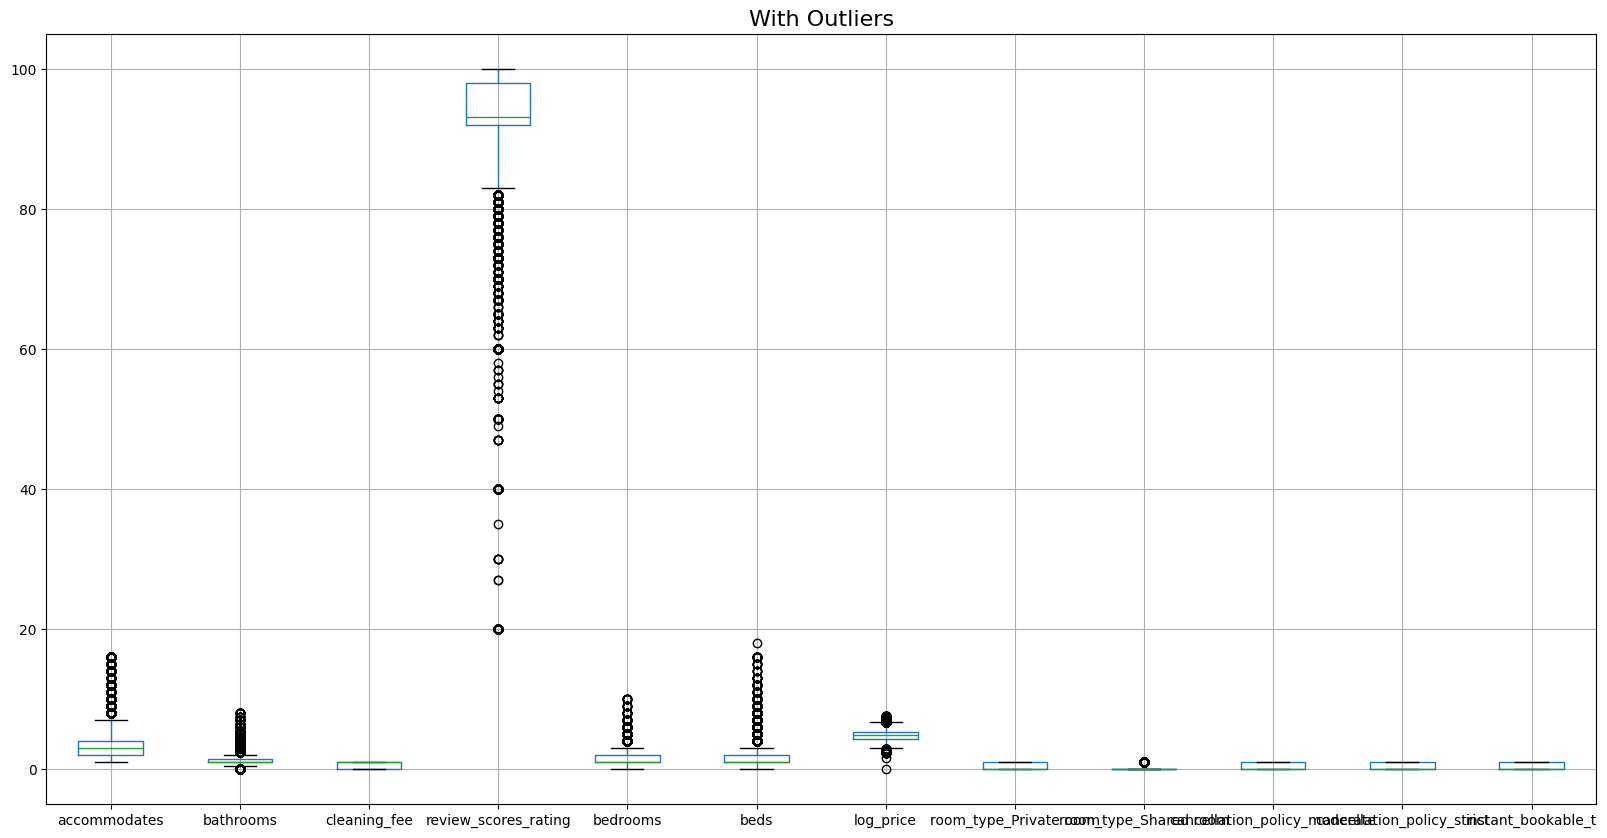

In [26]:
cont = df_knn.dtypes[(df_knn.dtypes != 'uint8') & (df_knn.dtypes != 'bool')].index
plt.figure(figsize = (20,10))
df_knn[cont].boxplot()
plt.title('With Outliers' , fontsize = 16)
plt.show()

In [27]:
def remove_outlier(column):
    
    sorted(column)
    
    Q1,Q3=np.percentile(column,[25,75])
    
    IQR = Q3-Q1
    
    lower_range= Q1-(1.5 * IQR)
    
    upper_range= Q3+(1.5 * IQR)
    
    return lower_range, upper_range

In [28]:
remove_outlier(df_mean['review_scores_rating'])

(np.float64(83.0), np.float64(107.0))

In [29]:
df_mean_out = df_mean.copy()
df_med_out = df_med.copy()
df_knn_out = df_knn.copy()

In [30]:
for column in df_med_out.columns:
    
    lr,ur=remove_outlier(df_med_out[column])
    
    
    df_med_out[column]=np.where(df_med_out[column]>ur,ur,df_med_out[column])
    
    
    df_med_out[column]=np.where(df_med_out[column]<lr,lr,df_med_out[column])

In [31]:
for column in df_mean_out.columns:
    
    lr,ur=remove_outlier(df_mean_out[column])
    
    
    df_mean_out[column]=np.where(df_mean_out[column]>ur,ur,df_mean_out[column])
    
    
    df_mean_out[column]=np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

In [32]:
for column in df_knn_out.columns:
    
    lr,ur=remove_outlier(df_knn_out[column])
    
    
    df_knn_out[column]=np.where(df_knn_out[column]>ur,ur,df_mean_out[column])
    
    
    df_knn_out[column]=np.where(df_knn_out[column]<lr,lr,df_mean_out[column])

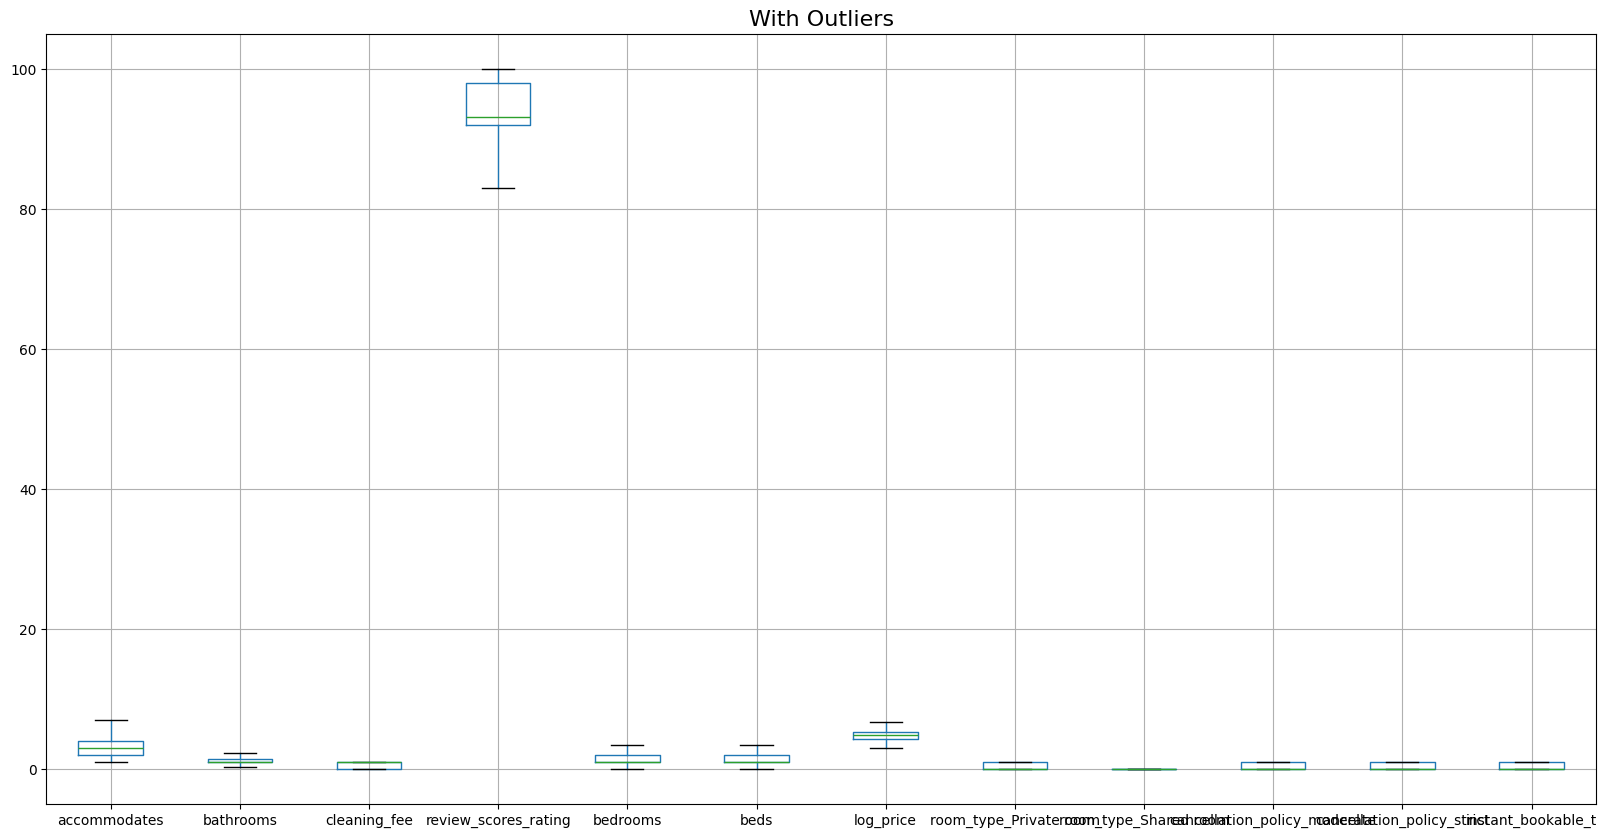

In [33]:
plt.figure(figsize = (20,10))
df_knn_out[cont].boxplot()
plt.title('With Outliers' , fontsize = 16)
plt.show()

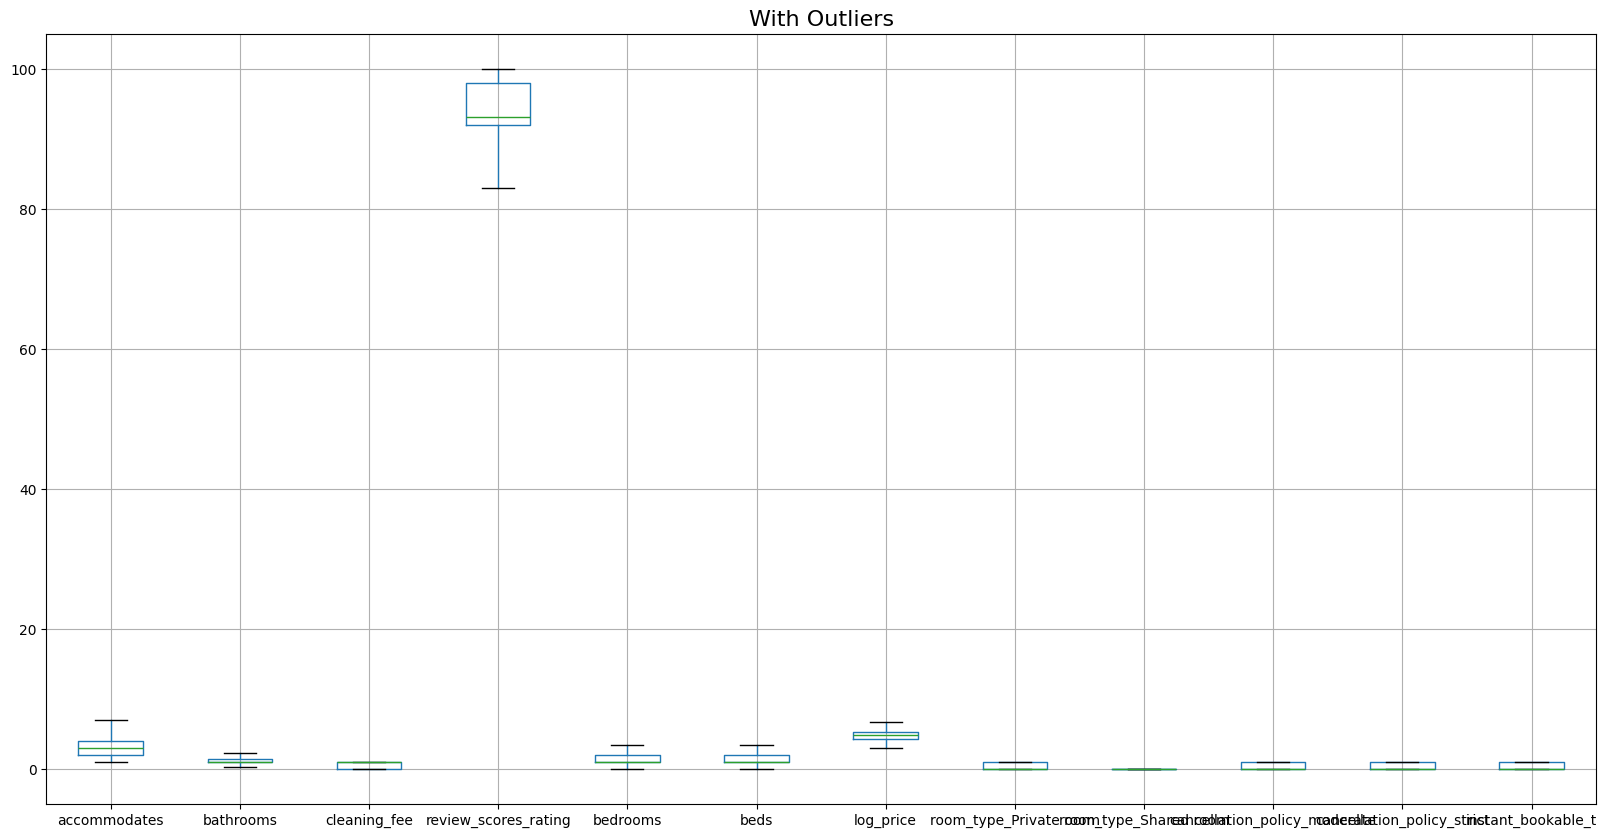

In [34]:
plt.figure(figsize = (20,10))
df_knn_out[cont].boxplot()
plt.title('With Outliers' , fontsize = 16)
plt.show()

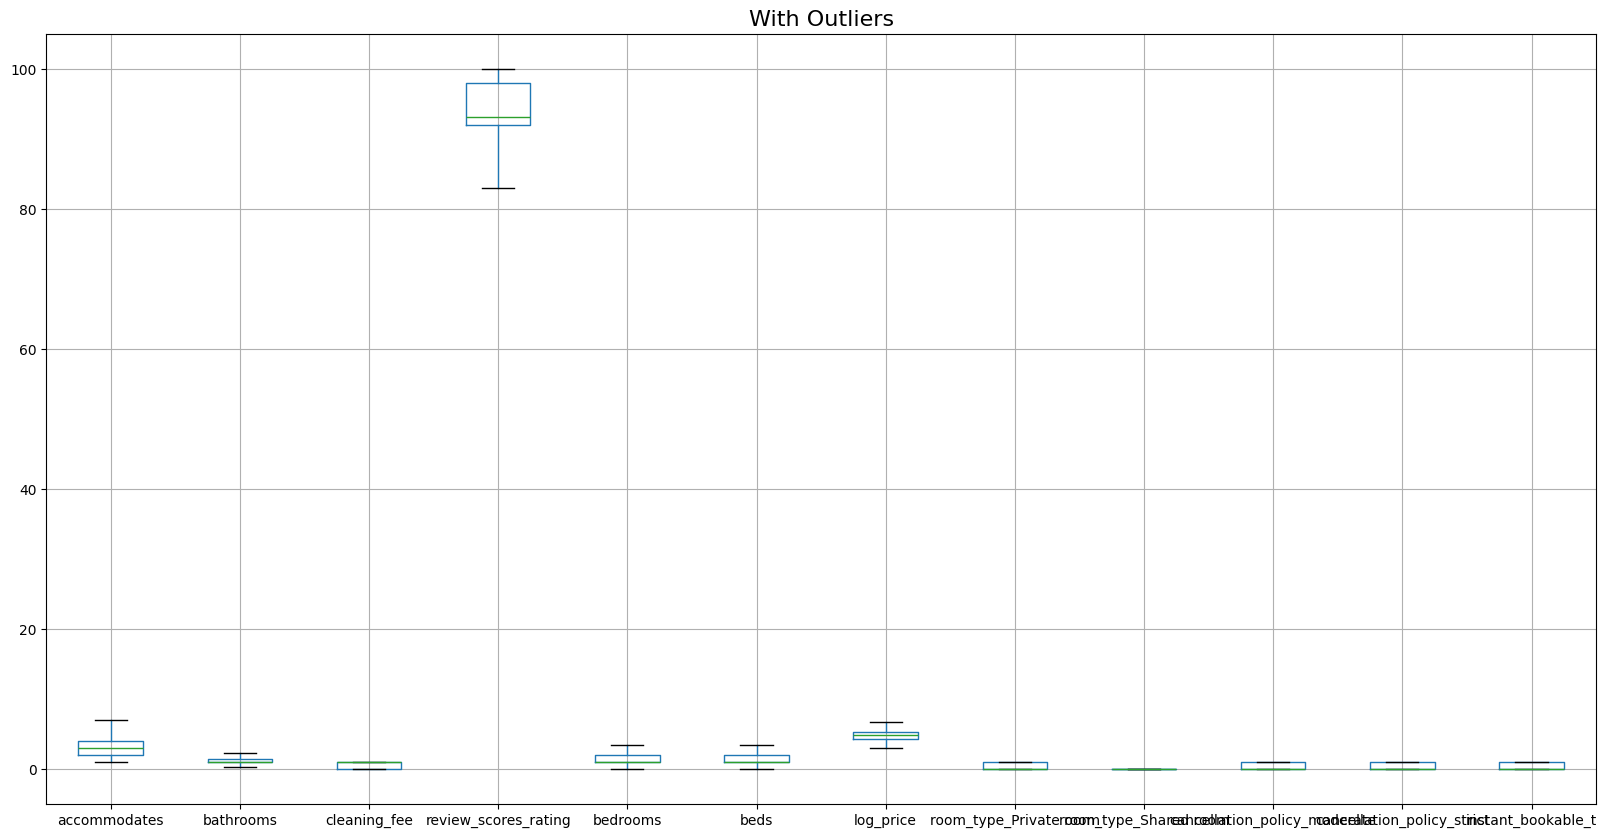

In [35]:
plt.figure(figsize = (20,10))
df_knn_out[cont].boxplot()
plt.title('With Outliers' , fontsize = 16)
plt.show()

## Data Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

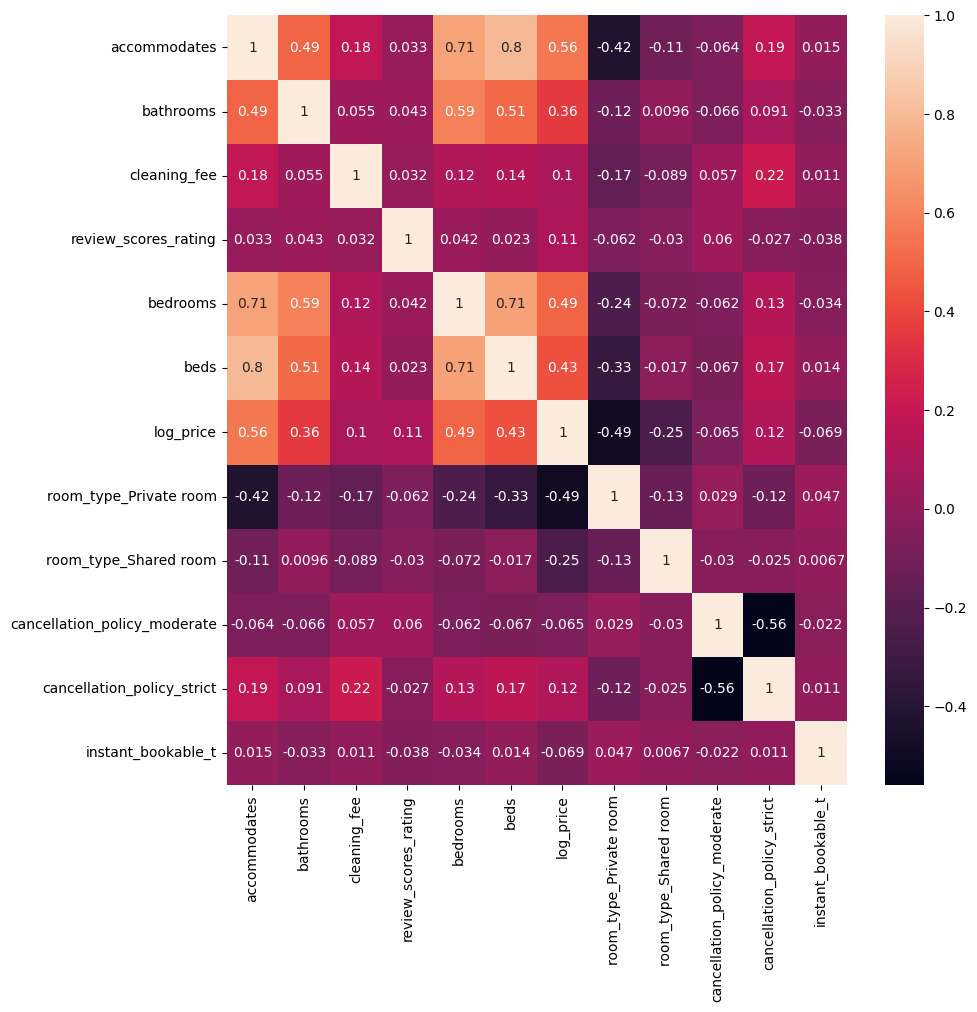

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mean.corr(),annot=True)

plt.show

## Train-Test-Split

### Mean Outlier Treated

In [37]:
X_mean_out = df_mean_out.drop('log_price' , axis = 1)
y_mean_out = df_mean_out[['log_price']]

In [38]:
X_mean_out

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,83.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.000000,2.0,3.5,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,93.202041,0.0,2.0,0.0,0.0,0.0,1.0,1.0


In [39]:
y_mean_out

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932
...,...
74104,4.356709
74107,5.043425
74108,5.220356
74109,5.273000


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mean_out, y_mean_out, test_size=0.3 , random_state=1)

## Linear Regression Model

In [41]:
regression_model = LinearRegression()
regression_model.fit(X_train , y_train)

LinearRegression()

In [42]:
regression_model.score(X_train , y_train)

0.4453405404485786

### Mean Outlier Not Treated

In [43]:
X_mean = df_mean.drop('log_price' , axis = 1)
y_mean = df_mean[['log_price']]

In [44]:
X_mean

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,93.202041,0.0,2.0,0.0,0.0,0.0,1.0,1.0


In [45]:
y_mean

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932
...,...
74104,4.356709
74107,5.043425
74108,5.220356
74109,5.273000


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size=0.3 , random_state=1)

In [47]:
regression_model = LinearRegression()
regression_model.fit(X_train , y_train)

LinearRegression()

In [48]:
regression_model.score(X_train , y_train)

0.5026453886994027

## Median Outlier Treated

In [49]:
X_med_out = df_med_out.drop('log_price' , axis = 1)
y_med_out = df_med_out[['log_price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_med_out, y_med_out, test_size=0.3 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train , y_train)
regression_model.score(X_train , y_train)

0.4453405404485786

### Median Outlier  Not Treated

In [50]:
X_med = df_med.drop('log_price' , axis = 1)
y_med = df_med[['log_price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_med, y_med, test_size=0.3 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train , y_train)
regression_model.score(X_train , y_train)

0.5026453886994027

### KNN Outlier Treated

In [51]:
X_knn_out = df_knn_out.drop('log_price' , axis = 1)
y_knn_out = df_knn_out[['log_price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_knn_out, y_knn_out, test_size=0.3 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train , y_train)
regression_model.score(X_train , y_train)

0.4453405404485786

### KNN Outlier Not Treated

In [52]:
X_knn = df_knn.drop('log_price' , axis = 1)
y_knn = df_knn[['log_price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train , y_train)
regression_model.score(X_train , y_train)

0.5026453886994027

In [53]:
df_1

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


In [54]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
25136,7.0,1.0,0.0,100.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4.709530
6288,1.0,2.0,0.0,99.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.806662
36561,2.0,1.0,0.0,80.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.844187
2034,16.0,1.0,1.0,100.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.396930
21668,3.0,1.0,0.0,93.202041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.499810


In [55]:
data_train.columns = data_train.columns.str.replace(' ', '_')

In [56]:
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
25136,7.0,1.0,0.0,100.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4.709530
6288,1.0,2.0,0.0,99.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.806662
36561,2.0,1.0,0.0,80.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.844187
2034,16.0,1.0,1.0,100.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.396930
21668,3.0,1.0,0.0,93.202041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.499810


In [57]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable_t+review_scores_rating +bedrooms + beds + room_type_Private_room + room_type_Shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee'

In [58]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       4.089034
accommodates                    0.074629
bathrooms                       0.156194
instant_bookable_t             -0.057925
review_scores_rating            0.006029
bedrooms                        0.154617
beds                           -0.050251
room_type_Private_room         -0.649057
room_type_Shared_room          -1.102319
cancellation_policy_moderate   -0.066478
cancellation_policy_strict     -0.014291
cleaning_fee                   -0.090397
dtype: float64

In [59]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.07462894458497228
The coefficient for bathrooms is 0.15619410944340317
The coefficient for cleaning_fee is -0.09039740449046334
The coefficient for review_scores_rating is 0.006028806002826008
The coefficient for bedrooms is 0.1546165671923324
The coefficient for beds is -0.0502511292526579
The coefficient for room_type_Private room is -0.6490567711083752
The coefficient for room_type_Shared room is -1.102319416636915
The coefficient for cancellation_policy_moderate is -0.06647819487045356
The coefficient for cancellation_policy_strict is -0.014290927638931583
The coefficient for instant_bookable_t is -0.057925496162736644


In [60]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.089034242391616


### Unvariate and Bivariate Anlaysis